**Gaussian mixture example**

In this code, we are going to show how to generate samples from a Gaussian mixture, as well as how to obtain the pdf of the mixture. We will use fixed parameters, but you can change them as you wish. The code is commented, so you can understand what is going on. The code is not optimized, so it may take a while to run if you use a large number of samples or a large number of Gaussians. If you have any questions, you can contact the instructor.

The first thing we need to do is to import the necessary libraries. We will use numpy to generate the samples and matplotlib to plot the results. We will also use the magic command `%matplotlib inline` to show the plots in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, we need to define the parameters of the Gaussian mixture, which are the means, the standard deviations, and the probabilities of sampling from each Gaussian (which must add up to 1). Although this example contains only two Gaussians, you can add as many as you want by simply adding the means, standard deviations, and probabilities to the corresponding arrays.

In [2]:
mu = np.array([0, 6])  # Means of each Gaussian
std = np.array([1, np.sqrt(2)])  # Standard deviation of each Gaussian
p = np.array([0.7, 0.3])  # Probability of sampling from each Gaussian: must add up to 1!

Now, we can generate the samples. We will use the function `np.random.choice` to generate the indexes of the Gaussians from which we will sample. Then, we will use the function `np.random.randn` to generate standard Gaussian samples. Finally, we will use the indexes and the parameters of the Gaussians to obtain the desired samples. We will generate 50000 samples, but you can change this number as you wish (note that the more samples you generate, the more accurate the empirical pdf will be, at the cost of computation time).

In [3]:
n_samples = 50000  # Number of samples to generate
u = np.random.choice(p.size, size=n_samples, p=p)  # Generate the indexes of each Gaussian
gaussian_samples = np.random.randn(n_samples)  # Generate standard Gaussian samples
samples = gaussian_samples * std[u] + mu[u]  # Now, use u, as well as std and mu, to obtain the desired samples

Let us now prepare for visualization. We will obtain the empirical pdf by using the function `np.histogram` (with the `density` parameter set to `True`, so that the histogram is normalized to a pdf). We will also obtain the theoretical pdf by using the function pdf expression that we have seen in theory:

$p(x)=\sum_i \pi_i N(\mu_i, \sigma_i) = \sum_i \pi_i \cdot \frac{1}{\sigma_i \sqrt{2 \pi}} e^{-\frac{(x-\mu_i)^2}{2\sigma_i^2}}$

Finally, we will plot both the histogram and the pdf, so that you can compare them.

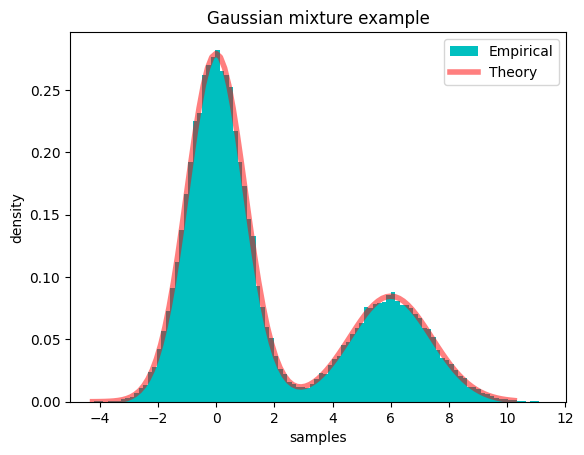

In [4]:
# Obtain empirical pdf
x_min = np.amin(mu) - 3 * np.amax(std)  # Min value to obtain pdf
x_max = np.amax(mu) + 3 * np.amax(std)  # Max value to obtain pdf
x_range = np.linspace(x_min, x_max, 100)  # Range of values for plots
pdfs = np.array([1/(np.sqrt(2*np.pi) * std[i]) * p[i] * np.exp(-np.square((x_range - mu[i]) / std[i]) / 2 ) for i in range(p.size)])  # Compute the sum terms of the mixture
mix_pdf = np.sum(pdfs, axis=0)  # Compute the pdf of the mixture (add the sum terms)

# Plotting
plt.hist(samples, bins=100, density=True, color='c', label='Empirical')  # Histogram: empirical pdf approximation
plt.plot(x_range, mix_pdf, color='r', linewidth=4, alpha=0.5, label='Theory')  # Theoretical pdf obtained using the expressions from the slides
plt.xlabel('samples')
plt.ylabel('density')
plt.title('Gaussian mixture example')
plt.legend(loc='best')
plt.show()